# Lab - Data-Centric Evaluation of ML Models

This lab is intended to accompany the lecture on Data-Centric Evaluation of ML Models. In this lab, you are given a training dataset and your goal is to improve the dataset in order to boost the accuracy of a fixed classification model on a given (fixed) test dataset. Reviewing the lecture notes will be helpful to get some ideas.

You can get all the dependencies you need for this notebook by running:

In [1]:
!pip install cleanlab matplotlib

In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score

import matplotlib.pyplot as plt

In [3]:
SEED = 123
np.random.seed(SEED)  # for reproducibility

# Load dataset

The data come from a 3-class classification task where the goal is to predict `y` based on features `x1`, ..., `x5`.
We convert the data to a numpy array format.

In [4]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df.head()

x0        x1        x2        x3        x4     x5  y
0 -0.333489 -0.770208 -2.697486 -0.628563 -1.277720  100.0  2
1 -0.787124  1.230800  1.415472 -0.805927  0.175115  100.0  1
2  0.781197 -0.856227  2.138879  2.495417  0.868192  100.0  1
3  1.895093 -0.885939  1.946352 -2.082747  0.064914  100.0  1
4  0.689091 -5.091299 -2.218682  0.330767  3.012755  100.0  2

In [6]:
df_test.head()

x0        x1        x2        x3        x4     x5  y
0  2.337701 -0.681121  1.883774  0.949812 -0.311507 -100.0  1
1  1.101249 -2.032961  0.344490  0.724925  1.355534 -100.0  2
2  1.791349 -2.808856 -1.409471  0.552069  0.433901  100.0  2
3  2.082599  0.811498  0.906920 -0.749352  1.974424 -100.0  2
4  1.214627 -0.448392  1.812024  0.429543  0.396450 -100.0  1

In [7]:
y = df["y"].values
df.drop(columns=["y"], inplace=True)
X = df.values

y_test = df_test["y"].values
df_test.drop(columns=["y"], inplace=True)
X_test = df_test.values

print(X)
print(y)

[[  -0.33348927   -0.7702077    -2.69748604   -0.62856274   -1.27772042
   100.        ]
 [  -0.7871239     1.23080016    1.41547226   -0.8059272     0.1751147
   100.        ]
 [   0.78119711   -0.85622725    2.13887864    2.49541712    0.86819164
   100.        ]
 ...
 [   1.19101444   -1.72465036   -1.17854745   -1.54881816   -1.51740071
  -100.        ]
 [  -2.03358571   -0.23977122    1.21509471    0.86023614    0.69816843
   100.        ]
 [   0.15125519   -1.21711969    2.77498591    0.7090941     0.89159205
  -100.        ]]
[2 1 1 ... 2 1 1]


Here's a simple plot of the first two features, colored by class. Visualizing the dataset may be helpful to you in this assignment, but can be tricky with 6-dimensional features!

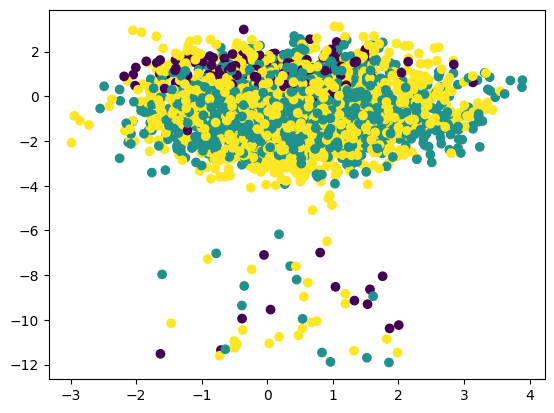

In [8]:
plt.scatter(X[:,0], X[:,1], c=list(y))

# Improve ML Model via data-centric techniques

We train a simple neural network model (Multi-Layer Perceptron classifier) and evaluate it on the given test set. 
Note that the evaluation metric used is `balanced_accuracy`. This is the accuracy amongst all examples in a given class, averaged over all classes, which better represents performance on minority classes.

You should never change the test data labels `y_test` in this lab, nor the neural network model. You may change the training data `X`, `y` as you see fit, and update `X_test` accordingly so your model is able to make predictions on it.

In [9]:
def train_evaluate_model(X_uesd, y, X_test, y_test, Original_X = X):
    Original_X_num = X.shape[0]
    Using_X_num = X_uesd.shape[0]
    proportion = Using_X_num / Original_X_num
    
    model = MLPClassifier(early_stopping=True, random_state=SEED)
    model.fit(X_uesd, y)
    predictions = model.predict(X_test)
    acc = balanced_accuracy_score(y_true=y_test, y_pred=predictions)

    print(f"Data used proportion = {proportion}")
    print(f"Balanced accuracy = {acc}")
    return predictions, acc

A baseline version of the model is trained on the original given data:

In [10]:
predictions, acc_baseline = train_evaluate_model(X, y, X_test, y_test)

Data used proportion = 1.0
Balanced accuracy = 0.5759397707696671


# Exercise

Your goal is to produce a version of this same model that has much better test accuracy! 
You should accomplish this by changing `X` and `y` as you see fit. Consider various ideas presented in the lecture and look through the data yourself to see if other ideas come to mind! Greater than 80% test accuracy is achievable without modifying the model at all. If you choose to drop/add features to `X` or renormalize some values, then you'll want to apply these operations to `X_test` as well.

In [11]:
## TODO: find my_X, my_y such that train_evaluate_model(my_X, my_y, X_test, y_test)
## reports better (higher) performance.


## Basic Visualization

We can take a glance at data distributions between $X_i$(ranging from 0~5)

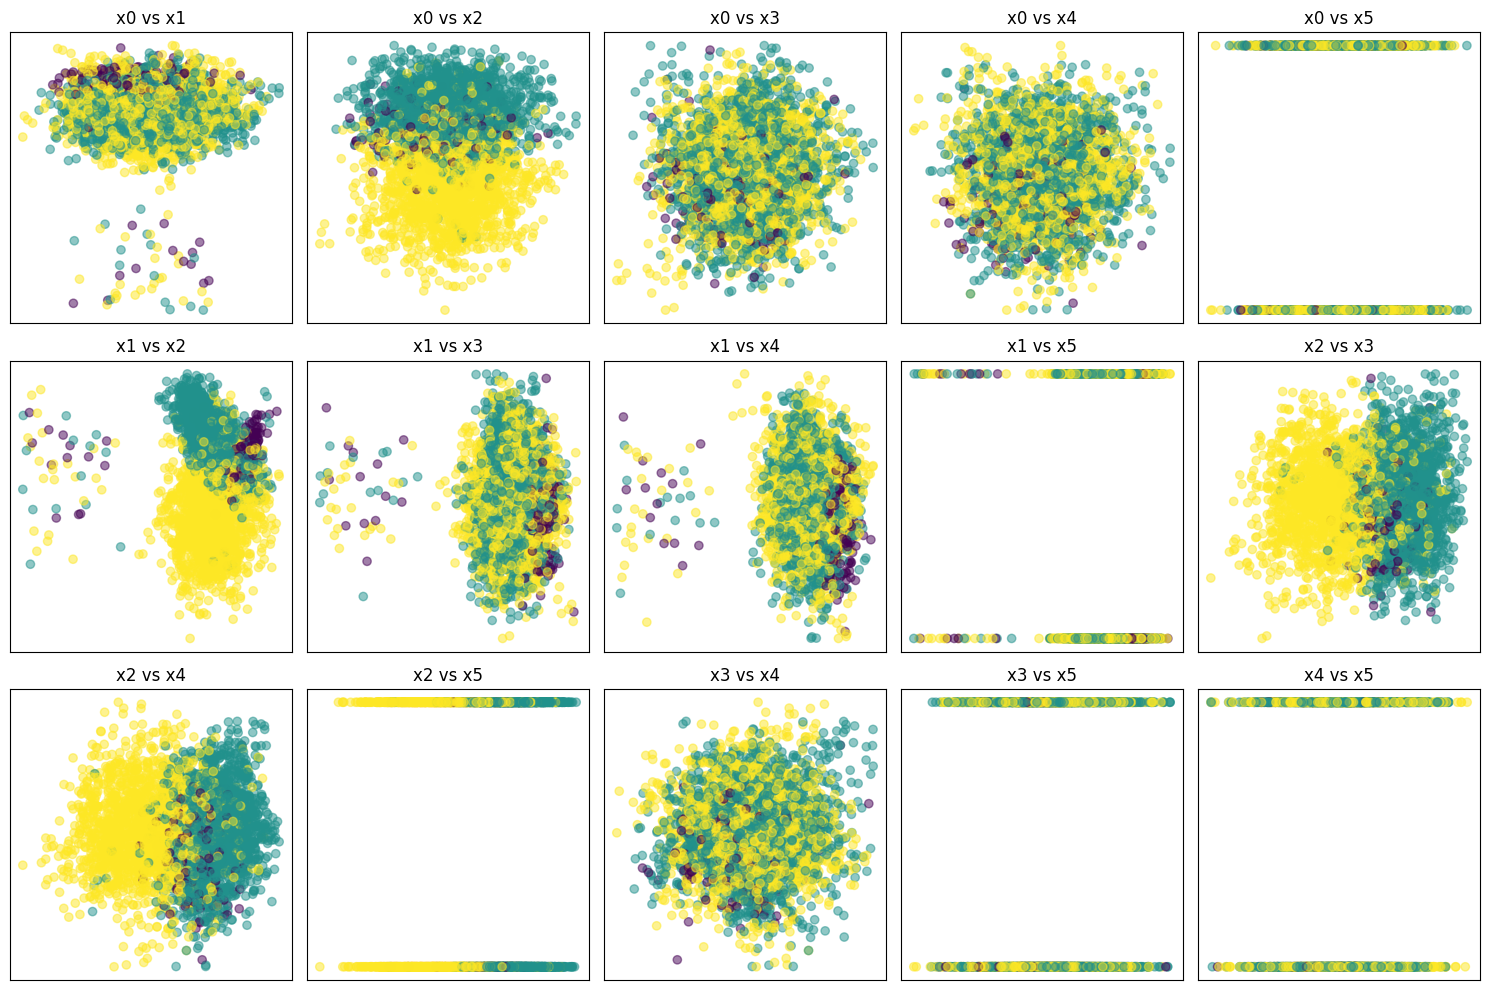

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# 假设 X 是你的特征矩阵（ndarray格式），y 是分类标签（也是ndarray）

# 生成特征组合的索引
feature_combinations = list(combinations(range(6), 2))

# 设置画布大小
plt.figure(figsize=(15, 10))

# 遍历所有特征组合
for index, (i, j) in enumerate(feature_combinations):
    plt.subplot(3, 5, index + 1)  # 创建子图，3行5列
    plt.scatter(X[:, i], X[:, j], c=y, cmap='viridis', alpha=0.5)  # 使用y进行颜色编码
    plt.title(f'x{i} vs x{j}')  # 给图表添加标题，指明对比的特征
    plt.xticks([])  # 移除x轴刻度
    plt.yticks([])  # 移除y轴刻度

plt.tight_layout()  # 调整子图间距
plt.show()


We can notice that all other attribute $X_i$ (0 $\leq$ i $\leq$ 4) and $X_5$ have multicollinearity, which will lead to redundant information about this attribute.

In [13]:
X_without_five = np.delete(X, 5, axis=1)
X_test_without_five = np.delete(X_test, 5, axis=1)

predictions, acc_baseline_without_five = train_evaluate_model(X_without_five, y, X_test_without_five, y_test)

Data used proportion = 1.0
Balanced accuracy = 0.6971385953816448


So maybe we can remove $X_5$ and make visualization clearer for EDA.

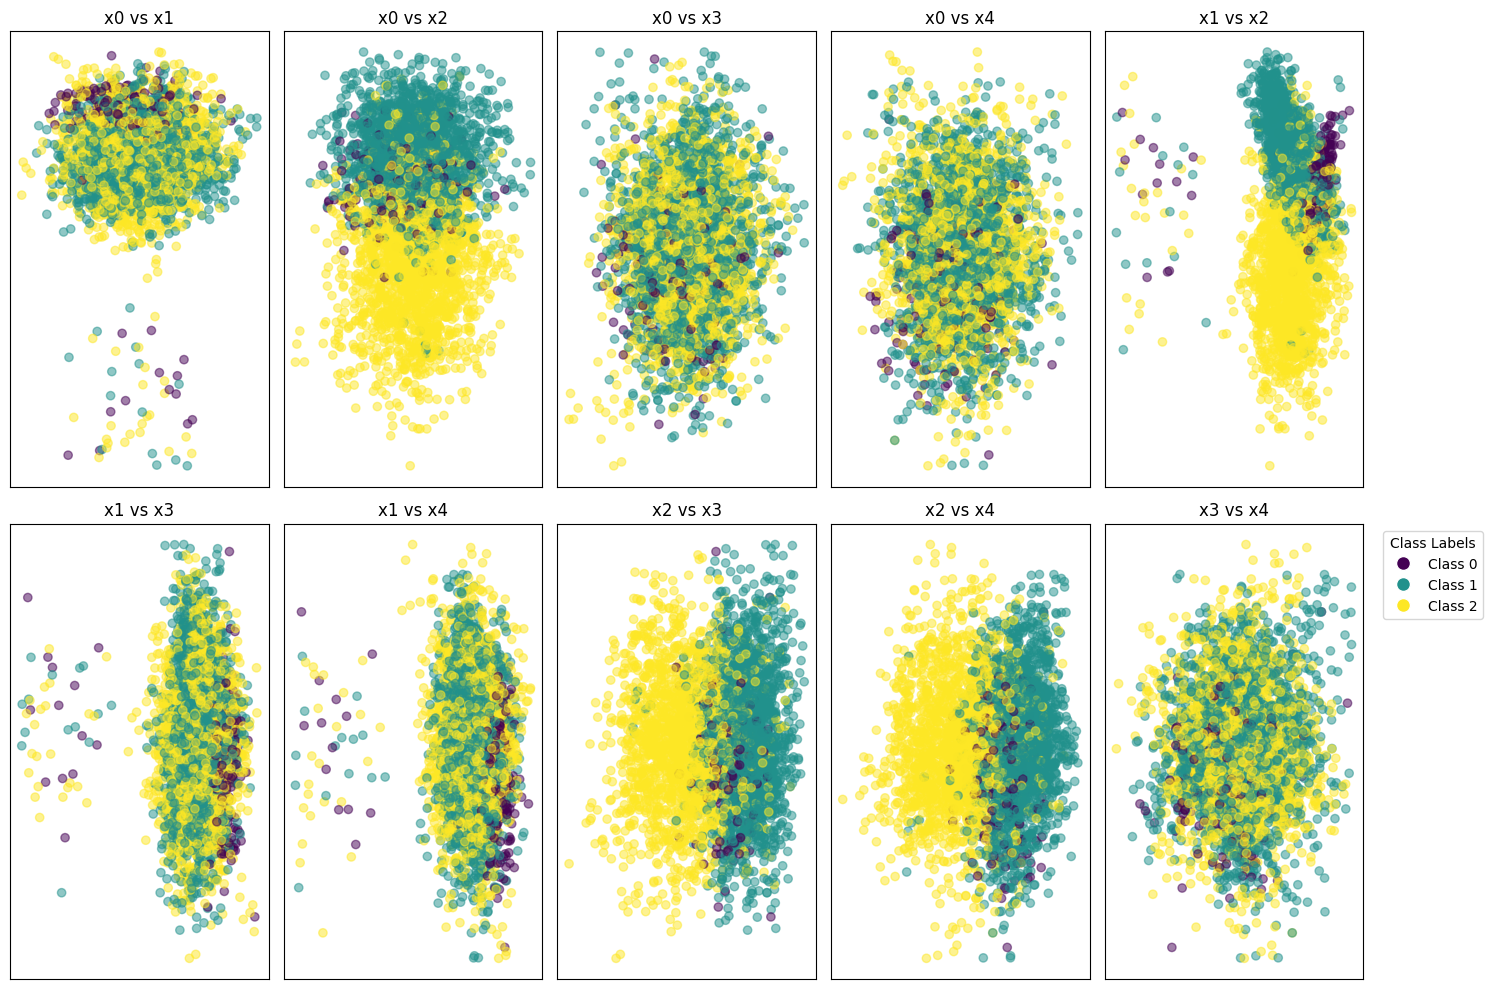

In [14]:
def Visualization(X,y_used): 
    feature_combinations = list(combinations(range(X.shape[1]), 2))

    plt.figure(figsize=(15, 10))

    for index, (i, j) in enumerate(feature_combinations):
        plt.subplot(2, 5, index + 1)  # 创建子图，3行5列
        scatter = plt.scatter(X[:, i], X[:, j], c=y_used, cmap='viridis', alpha=0.5)  # 使用y进行颜色编码
        plt.title(f'x{i} vs x{j}')  # 给图表添加标题，指明对比的特征
        plt.xticks([])  # 移除x轴刻度
        plt.yticks([])  # 移除y轴刻度

    classes = np.unique(y_used)
    class_labels = ['Class 0', 'Class 1', 'Class 2']
    colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(classes))]

    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=class_label)
                    for col, class_label in zip(colors, class_labels)]

    # 添加图例
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Class Labels")

    plt.tight_layout()  # 调整子图间距
    plt.show()

Visualization(X_without_five, y)


## Outliers

### $3-\sigma$ Principle
We can notice that some data in the x1 feature and most of the data are not in similar areas. Will acc improved after we filter them out?

In [15]:
def three_sigma_principle(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    non_outlier_indices = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)

    X_filtered = X[non_outlier_indices]
    indices_filtered = np.where(non_outlier_indices)[0]
    print("The proportion of data filtered: {}%".format(X_filtered.shape[1] / X.shape[1]))
    return X_filtered, indices_filtered

X_without_five_filtered, indices = three_sigma_principle(X_without_five)

The proportion of data filtered: 1.0%


In [16]:
y_filtered = y[indices]

predictions, acc = train_evaluate_model(X_without_five_filtered, y_filtered, X_test_without_five, y_test)

Data used proportion = 0.979328165374677
Balanced accuracy = 0.6918822892861618


It drops... So maybe the outliers are consistent with the test distribution. We can not simply remove them.

## Data Distribution


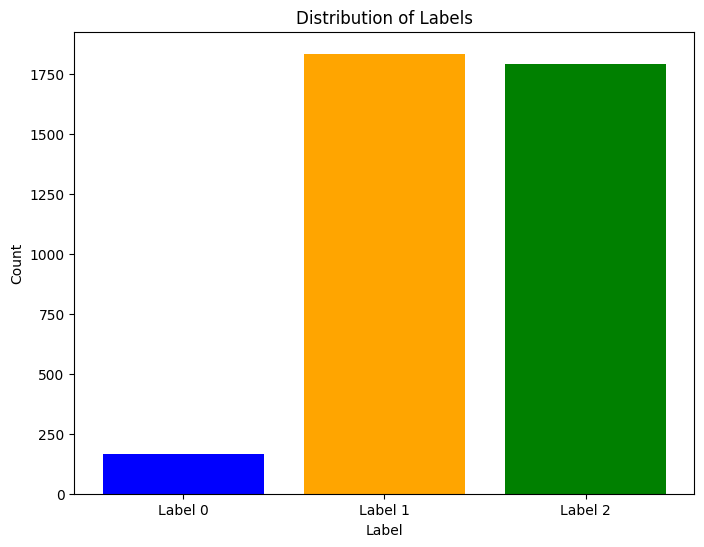

In [17]:
def visualize_distribution(y):

    unique, counts = np.unique(y, return_counts=True)
    labels_counts = dict(zip(unique, counts))

    plt.figure(figsize=(8, 6))
    plt.bar(labels_counts.keys(), labels_counts.values(), color=['blue', 'orange', 'green'])
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Distribution of Labels')
    plt.xticks(ticks=list(labels_counts.keys()), labels=[f'Label {label}' for label in labels_counts.keys()])
    plt.show()

visualize_distribution(y_filtered)

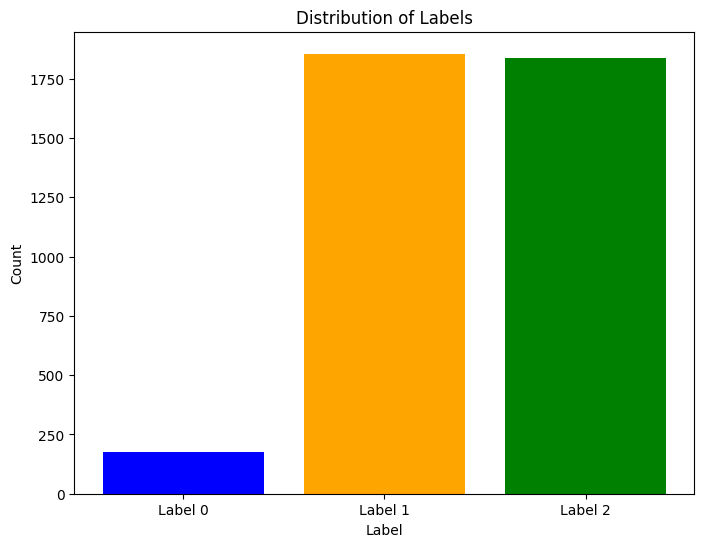

In [18]:
visualize_distribution(y)

Quite imbalanced... Maybe we should try upsampling or generate synthetic data techniques.

### Upsampling

### Gen-Data Augmentation


In [19]:
from timeit import repeat
from sklearn.utils import shuffle

def random_augmentation(X_original, y_original, noisy=0.01):

    noise = np.random.normal(0, 0.01, X_original.shape) 
    X_augmented = X_original + noise 

    X_augmented, y_augmented = shuffle(X_augmented, y_original, random_state=0)

    print("X_augmented_num: {}, y_augmented_num: {}".format(X_augmented.shape, y_augmented.shape))

    return X_augmented, y_augmented

def generate_data(X_original, y_original, repeat=2):

    X_simulated = np.repeat(X_original, repeat, axis=0)  # 数据重复
    noise_simulated = np.random.normal(0, 0.01, X_simulated.shape)  # 生成噪声
    X_simulated = X_simulated + noise_simulated  # 添加噪声
    y_simulated = np.repeat(y_original, repeat)  # 标签也相应重复

    # 混洗增强后的数据
    # 这段代码使用了shuffle函数，其作用是随机打乱数据集中的数据点顺序，同时保持特征数据X和标签y之间的对应关系。
    # 混洗数据是数据预处理过程中的一个常见步骤，尤其是在进行模型训练之前，可以帮助减少或消除数据顺序可能带来的偏差。
    X_simulated, y_simulated = shuffle(X_simulated, y_simulated, random_state=0)

    # 输出增强后的数据大小
    print("X_simulated_num: {}, y_simulated_num: {}".format(X_simulated.shape, y_simulated.shape))

    return X_simulated, y_simulated

X_augmented, y_augmented = random_augmentation(X_without_five, y, noisy=0.01)
X_simulated, y_simulated = generate_data(X_without_five, y, repeat=2)

X_augmented_num: (3870, 5), y_augmented_num: (3870,)
X_simulated_num: (7740, 5), y_simulated_num: (7740,)


Simply evaluate the method we purpose and conduct a parameter search for noisy and repeat, which make sense in the whole process.

In [20]:
predictions, acc_sim = train_evaluate_model(X_simulated, y_simulated, X_test_without_five, y_test)
predictions, acc_aug = train_evaluate_model(X_augmented, y_augmented, X_test_without_five, y_test)

Data used proportion = 2.0
Balanced accuracy = 0.7213546128342713
Data used proportion = 1.0
Balanced accuracy = 0.6912829316512136


X_augmented_num: (3870, 5), y_augmented_num: (3870,)


Data used proportion = 1.0
Balanced accuracy = 0.6893336139124222
X_augmented_num: (3870, 5), y_augmented_num: (3870,)
Data used proportion = 1.0
Balanced accuracy = 0.6895166635188655
X_augmented_num: (3870, 5), y_augmented_num: (3870,)
Data used proportion = 1.0
Balanced accuracy = 0.6914617755227167
X_augmented_num: (3870, 5), y_augmented_num: (3870,)
Data used proportion = 1.0
Balanced accuracy = 0.6912829316512136
X_augmented_num: (3870, 5), y_augmented_num: (3870,)
Data used proportion = 1.0
Balanced accuracy = 0.6912787259162734
X_simulated_num: (3870, 5), y_simulated_num: (3870,)
Data used proportion = 1.0
Balanced accuracy = 0.6916441241733368
X_simulated_num: (7740, 5), y_simulated_num: (7740,)
Data used proportion = 2.0
Balanced accuracy = 0.7248514811639256
X_simulated_num: (11610, 5), y_simulated_num: (11610,)
Data used proportion = 3.0
Balanced accuracy = 0.7426461231306939
X_simulated_num: (15480, 5), y_simulated_num: (15480,)
Data used proportion = 4.0
Balanced accuracy

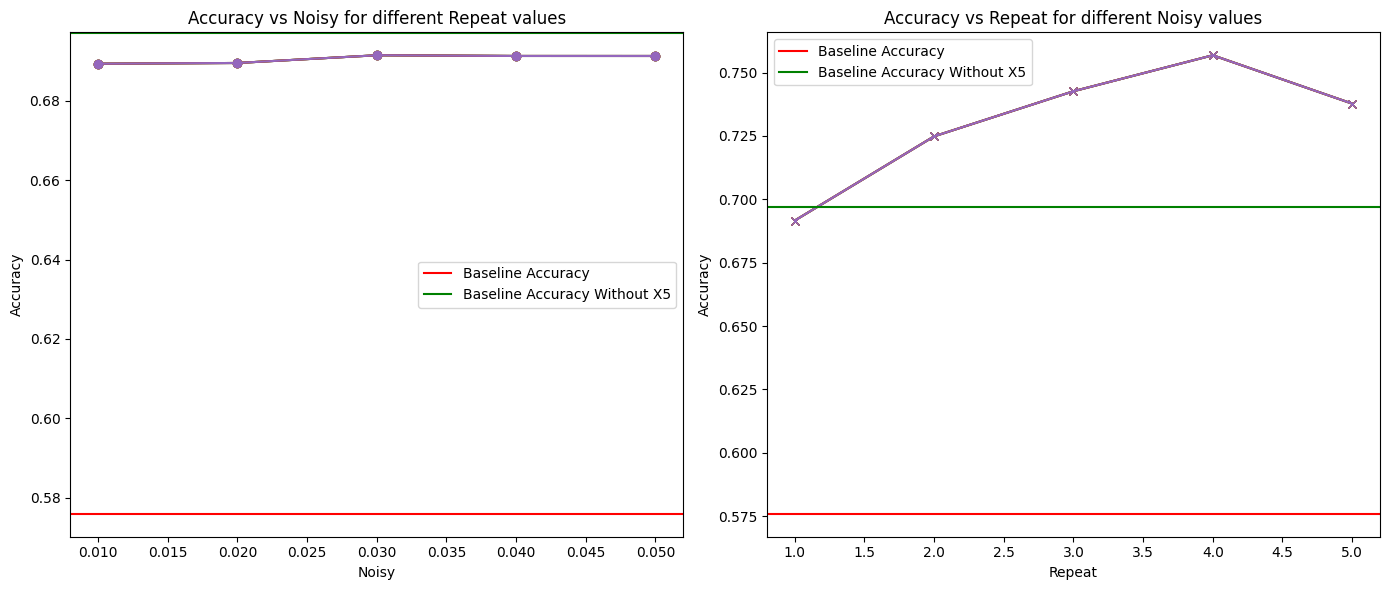

In [21]:
noisy_values = [0.01, 0.02, 0.03, 0.04, 0.05]
repeat_values = [1, 2, 3, 4, 5]
acc_sim_results = []
acc_aug_results = []
baseline_accuracy = acc_baseline
baseline_accuracy_without_five = acc_baseline_without_five

for noisy in noisy_values:
    X_augmented, y_augmented = random_augmentation(X_without_five, y, noisy)
    _, acc_aug = train_evaluate_model(X_augmented, y_augmented, X_test_without_five, y_test)
    acc_aug_results.append(acc_aug)

for repeat in repeat_values:
    X_simulated, y_simulated = generate_data(X_without_five, y, repeat)
    _, acc_sim = train_evaluate_model(X_simulated, y_simulated, X_test_without_five, y_test)
    acc_sim_results.append(acc_sim)

# 准备画布
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1, 2, 1)
# 第一幅子图：按noisy参数
for idx, noisy in enumerate(noisy_values):
    axs[0].plot(noisy_values, acc_aug_results, marker='o')

plt.axhline(y=baseline_accuracy, color='r', linestyle='-', label='Baseline Accuracy')
plt.axhline(y=baseline_accuracy_without_five, color='g', linestyle='-', label='Baseline Accuracy Without X5')
axs[0].set_xlabel('Noisy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs Noisy for different Repeat values')
axs[0].legend()

plt.subplot(1, 2, 2)
# 第二幅子图：按repeat参数
for idx, repeat in enumerate(repeat_values):
    axs[1].plot(repeat_values, acc_sim_results, marker='x')
plt.axhline(y=baseline_accuracy, color='r', linestyle='-', label='Baseline Accuracy')
plt.axhline(y=baseline_accuracy_without_five, color='g', linestyle='-', label='Baseline Accuracy Without X5')

axs[1].set_xlabel('Repeat')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy vs Repeat for different Noisy values')
axs[1].legend()

plt.tight_layout()
plt.show()

Above are naive tries, which did not bring data distribution into consideration. Now we implement a simple Distribution-aware sample mechanism.

In [22]:
from sklearn.utils import resample

def naive_balance_sample(X, y):

    class_counts = np.bincount(y)
    max_count = np.max(class_counts)  

    X_balanced = np.copy(X)
    y_balanced = np.copy(y)

    for class_id in np.unique(y):
        class_sample_count = class_counts[class_id]
        if class_sample_count < max_count:

            n_samples_to_add = max_count - class_sample_count

            X_class = X[y == class_id]
            # Resample
            X_upsampled, y_upsampled = resample(X_class, np.full(class_sample_count, class_id),
                                                n_samples=n_samples_to_add, random_state=0)

            X_balanced = np.vstack((X_balanced, X_upsampled))
            y_balanced = np.append(y_balanced, y_upsampled)

        return X_balanced, y_balanced

X_without_five_balanced, y_balanced = naive_balance_sample(X_without_five, y)

In [23]:
predictions, acc_balanced = train_evaluate_model(X_without_five_balanced, y_balanced, X_test_without_five, y_test)

Data used proportion = 1.43359173126615
Balanced accuracy = 0.8325310270277533


Ops...It turns out that distribution of data counts. Can we step further for higher performance or more effcient. 

## Inspirations From Literature

### K-NN Sampling

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def KMeans_Sampling(X, y, threshold=0.5):

    unique, counts = np.unique(y, return_counts=True)
    
    n_clusters = len(unique)  

    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED).fit(X)

    cluster_centers = kmeans.cluster_centers_

    closest, distances = pairwise_distances_argmin_min(X, cluster_centers)
    print(distances)

    threshold = threshold

    to_keep = distances >= threshold

    X_filtered = X[to_keep]
    y_filtered = y[to_keep]

    deleted_ratio = 1 - len(X_filtered) / len(X)
    print(f"Deleted ratio: {deleted_ratio:.2%}")

    return X_filtered, y_filtered

X_kmeans, y_kmeans = KMeans_Sampling(X_without_five, y, threshold=0.8)

[2.66509461 2.09288424 2.08196805 ... 3.0535752  2.73822697 0.86884966]
Deleted ratio: 1.37%


In [25]:
predictions, acc_kmeans = train_evaluate_model(X_kmeans, y_kmeans, X_test_without_five, y_test)

Data used proportion = 0.9863049095607235
Balanced accuracy = 0.6436468839084414


What will happen if we combine synthetic/Resampling data and this sampling method? Maybe we can use less data and maintain a higher performance.

In [26]:
X_kmeans_balanced, y_kmeans_balanced = KMeans_Sampling(X_without_five_balanced, y_balanced, threshold=1.8)

[4.07178472 1.50812615 2.59001524 ... 2.11669194 0.89626275 2.30586092]
Deleted ratio: 31.13%


In [27]:
predictions, acc_kmeans = train_evaluate_model(X_kmeans_balanced, y_kmeans_balanced, X_test_without_five, y_test)

Data used proportion = 0.9873385012919896
Balanced accuracy = 0.8061843867139337


Wow, while using our strategy, we ues only 98% data as original and reach 0.8062 point. Maybe we can further use confident learning to reduce the amount of data.

In [28]:
from sklearn.model_selection import cross_val_predict

def get_prediction(X, y):

    model = MLPClassifier(early_stopping=True, random_state=SEED)
    model.fit(X, y)
    pred_probs = cross_val_predict(model, X, y, method='predict_proba', cv=10)

    return pred_probs

prediction_array = get_prediction(X_kmeans_balanced, y_kmeans_balanced)

prediction_array.shape

(3821, 3)

In [29]:
from cleanlab.filter import find_label_issues

numpy_array_of_noisy_labels = y_kmeans_balanced
numpy_array_of_predicted_probabilities = prediction_array

ordered_label_errors = find_label_issues(
        labels=numpy_array_of_noisy_labels,
        pred_probs=numpy_array_of_predicted_probabilities,
    )

ordered_label_errors

/opt/homebrew/anaconda3/envs/data100/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([False, False, False, ..., False, False, False])

In [30]:
index = np.where(ordered_label_errors == False)[0]

X_kmeans_balanced_clean = X_kmeans_balanced[index]
y_kmeans_balanced_clean = y_kmeans_balanced[index]

predictions, acc_clean = train_evaluate_model(X_kmeans_balanced_clean, y_kmeans_balanced_clean, X_test_without_five, y_test)

Data used proportion = 0.9356589147286821
Balanced accuracy = 0.8082581337736698


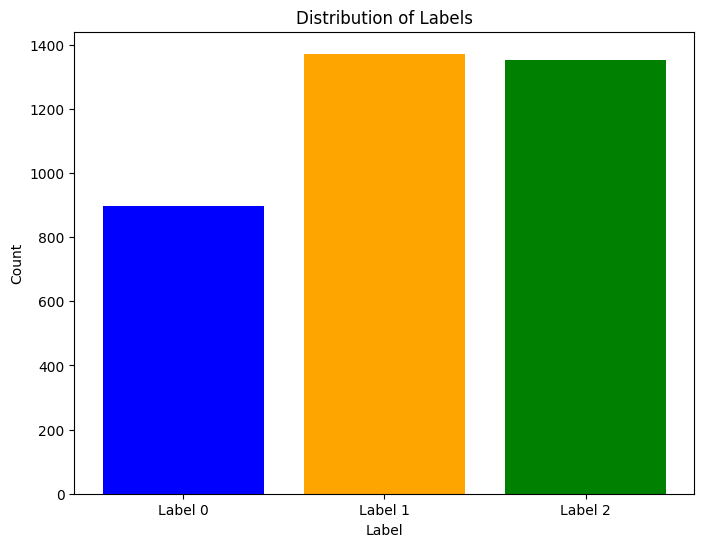

In [31]:
visualize_distribution(y_kmeans_balanced_clean)

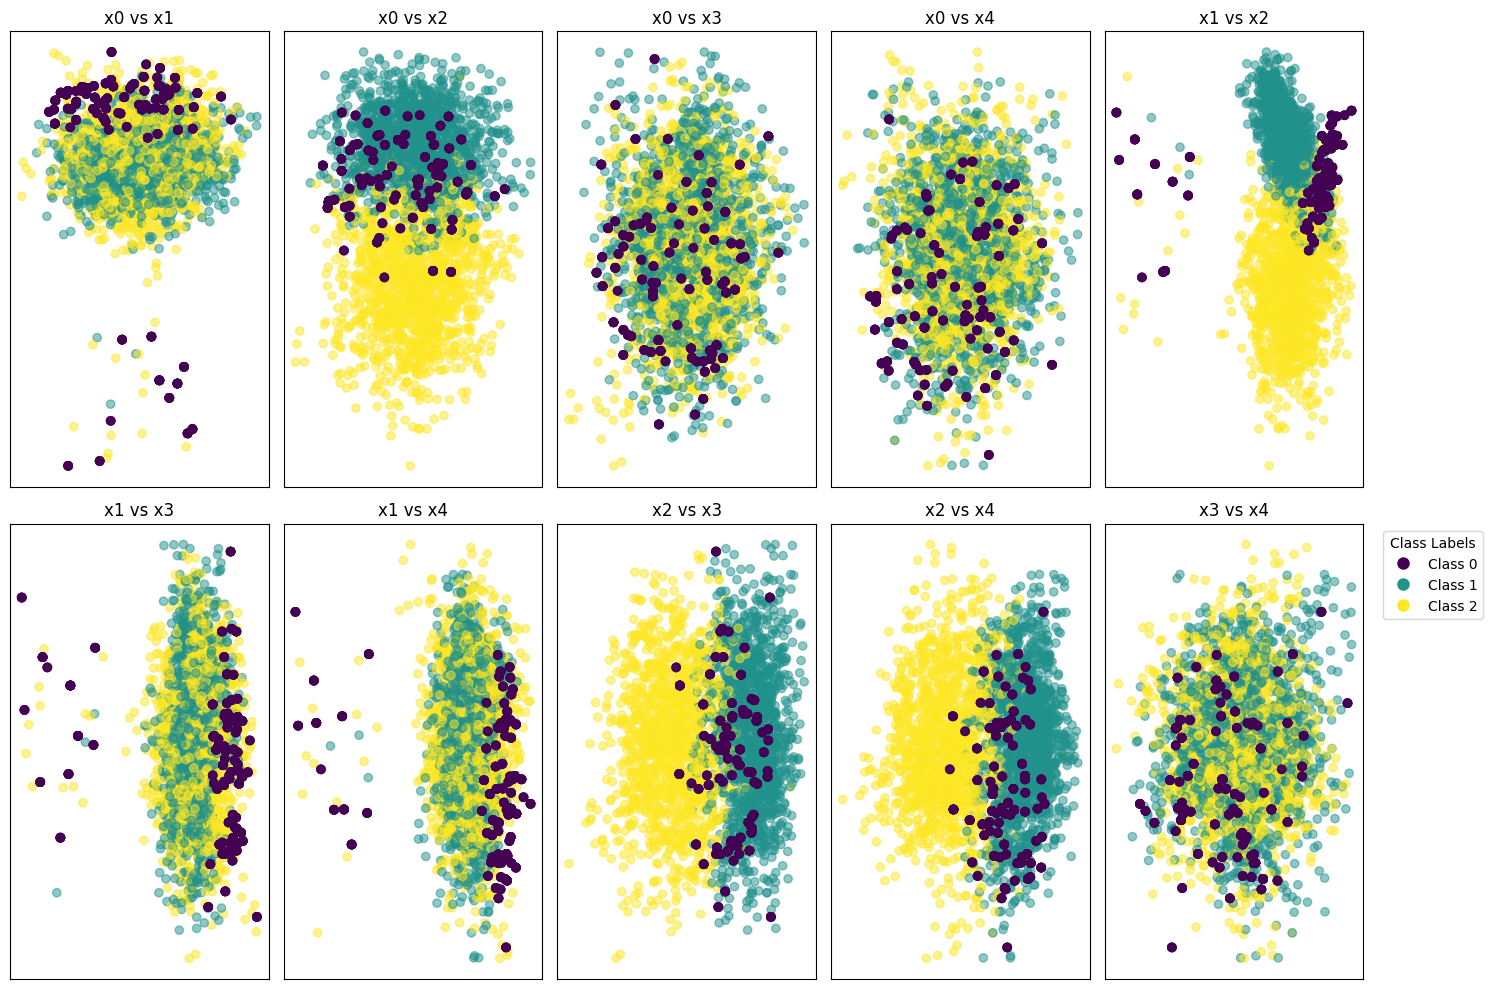

In [32]:
Visualization(X_kmeans_balanced_clean, y_kmeans_balanced_clean)

In [33]:
X_kmeans_balanced_clean2, y_kmeans_balanced_clean2 = naive_balance_sample(X_kmeans_balanced_clean, y_kmeans_balanced_clean)
predictions, acc_iter = train_evaluate_model(X_kmeans_balanced_clean2, y_kmeans_balanced_clean2, X_test_without_five, y_test)

X_kmeans_balanced2, y_kmeans_balanced2 = KMeans_Sampling(X_kmeans_balanced_clean2, y_kmeans_balanced_clean2, threshold=1.8)
predictions, acc_iter = train_evaluate_model(X_kmeans_balanced2, y_kmeans_balanced2, X_test_without_five, y_test)

numpy_array_of_noisy_labels = y_kmeans_balanced2
numpy_array_of_predicted_probabilities = get_prediction(X_kmeans_balanced2, y_kmeans_balanced2)

ordered_label_errors = find_label_issues(
        labels=numpy_array_of_noisy_labels,
        pred_probs=numpy_array_of_predicted_probabilities,
    )
index = np.where(ordered_label_errors == False)[0]

X_kmeans_balanced_clean2 = X_kmeans_balanced2[index]
y_kmeans_balanced_clean2 = y_kmeans_balanced2[index]

predictions, acc_iter = train_evaluate_model(X_kmeans_balanced_clean2, y_kmeans_balanced_clean2, X_test_without_five, y_test)

Data used proportion = 1.058139534883721
Balanced accuracy = 0.815205443967956
[2.68753471 2.59244406 3.12838309 ... 2.93512657 2.52068322 2.37816559]
Deleted ratio: 10.11%
Data used proportion = 0.9511627906976744
Balanced accuracy = 0.8204342335946139
Data used proportion = 0.9457364341085271
Balanced accuracy = 0.8170303323858027


The The effectiveness of self-confidence learning is weakened, we only need to do the rest steps. Let's do it iteratively and see whether the performance will be better?

In [34]:
final_acc = 0

X_temp, y_temp = X_kmeans_balanced2, y_kmeans_balanced2
baseline = 0.82
threshold = 1.8
iteration = 0
acc_list = []

while final_acc < 0.85 and iteration <= 20:

    X_kmeans_balanced_clean_new, y_kmeans_balanced_clean_new = naive_balance_sample(X_temp, y_temp) # start from above results

    predictions, acc_iter = train_evaluate_model(X_kmeans_balanced_clean_new, y_kmeans_balanced_clean_new, X_test_without_five, y_test)
    acc_list.append(acc_iter)

    X_kmeans_new_balanced_clean_new, y_kmeans_new_balanced_clean_new = KMeans_Sampling(X_kmeans_balanced_clean_new, y_kmeans_balanced_clean_new, threshold=threshold)

    predictions, acc_iter2 = train_evaluate_model(X_kmeans_new_balanced_clean_new, y_kmeans_new_balanced_clean_new, X_test_without_five, y_test)
    acc_list.append(acc_iter2)

    iteration += 1

    if acc_iter2 > acc_iter:
        final_acc = acc_iter2
        X_temp, y_temp = X_kmeans_new_balanced_clean_new, y_kmeans_new_balanced_clean_new
    else: 
        threshold += 0.01
    
    if acc_iter < baseline:
        break


Data used proportion = 0.9511627906976744
Balanced accuracy = 0.8204342335946139
[2.76545003 2.62080654 3.14060017 ... 2.9122609  2.50405181 2.3611101 ]
Deleted ratio: 0.27%
Data used proportion = 0.9485788113695091
Balanced accuracy = 0.815201238233016
Data used proportion = 0.9511627906976744
Balanced accuracy = 0.8204342335946139
[2.76545003 2.62080654 3.14060017 ... 2.9122609  2.50405181 2.3611101 ]
Deleted ratio: 0.38%
Data used proportion = 0.9475452196382429
Balanced accuracy = 0.8209826814581205
Data used proportion = 0.9475452196382429
Balanced accuracy = 0.8209826814581205
[4.23583372 2.27700041 3.49682997 ... 2.80264779 2.17516254 2.24545109]
Deleted ratio: 8.13%
Data used proportion = 0.8705426356589148
Balanced accuracy = 0.8128807353988602
Data used proportion = 0.9475452196382429
Balanced accuracy = 0.8209826814581205
[4.23583372 2.27700041 3.49682997 ... 2.80264779 2.17516254 2.24545109]
Deleted ratio: 8.24%
Data used proportion = 0.8695090439276486
Balanced accuracy = 

In [36]:
max(acc_list)

0.8209826814581205